In [1]:
import tweepy
import wordcloud
from textblob import TextBlob
import re
import spacy

In [2]:
api_key = "btZzNAPzYRVauFxGZp0ylCiWq"
api_secret = "uAatv7uLAqG1nkgad180vtaw1P2aTp4hH7QOrsDtZa3R2d97Cv"
access_token = "857530568-NtMnTwJbeAUsBJ75akfvUlFyU8WSEvoXxxZOeJqy"
access_token_secret = "TBV1OofYaYVBR20T7lLUQplVqzbkVFOgmRGlF2OG9nn3e"

In [3]:
auth = tweepy.OAuthHandler(api_key,api_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [4]:
tweets = api.search(q="Reliance jio",count=20,tweet_mode="extended")

In [5]:
sents = []
clean_tweets = []

for tw in tweets:
    tw = tw.full_text
    tw = re.sub("@[a-zA-Z0-9:_]+","",tw) # remove handles
    tw = re.sub("#","",tw) # remove #
    tw = re.sub("RT","",tw)
    tw = re.sub("http[a-zA-Z0-9._\/:\%]+","",tw) # to remove urls
    tw = tw.strip() # to remove whitespace from end and begining of text
    print(tw)
    if len(tw)>10:
        tw = TextBlob(tw)
        if tw.detect_language()!='en':
            tw = tw.translate(to='en')
            print(tw.raw)
        clean_tweets.append(tw.raw)
        if tw.sentiment.polarity>+0.1:
            print("Positive")
            sents.append("Positive")
        elif tw.sentiment.polarity<-0.1:
            print("Negative")
            sents.append("Negative")
        else:
            print("Neutral")
            sents.append("Neutral")
        print("****************************")
        print("\n")

Get the latest TCL L7 Jio exclusive smartphone at a price of just ₹4 999*/- from Reliance Digital. Shop now from any o…
Positive
****************************


😶2014 general election was 'rigged' by BJP, claims cyber expert
Neutral
****************************


reliance jio hotspot is giving very low speed despite being a corporate customer . Which means every month reliance jio is earning huge money as fixed revenue and in return it is not giving promised speed . It’s a breach of agreement by earning through unfair means
Neutral
****************************


reliance hot spot is giving this low speed at kharghar . Reliance jio is taking money as usual and not giving its service . In a way cheating to customer
Neutral
****************************


Getting rid of Jio and other reliance products if this takes place. 

FYI
Negative
****************************


Reliance Jio का शानदार ऑफर, एक प्लान को 4 लोग को मिलेगा 200GB डाटा इस्तेमाल करने का मौका...reliance  Jio jiophone Telecom Pre

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


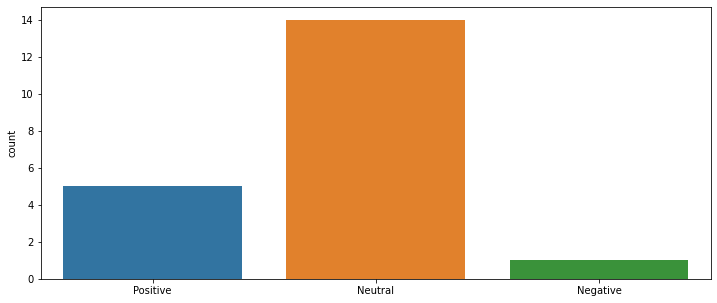

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(sents)
plt.show()

# Wordcloud analysis

In [7]:
df = pd.DataFrame({"tweets":clean_tweets,"sents":sents})
df.head()

,tweets,sents
0,Get the latest TCL L7 Jio exclusive smartphone...,Positive
1,"😶2014 general election was 'rigged' by BJP, cl...",Neutral
2,reliance jio hotspot is giving very low speed ...,Neutral
3,reliance hot spot is giving this low speed at ...,Neutral
4,Getting rid of Jio and other reliance products...,Negative


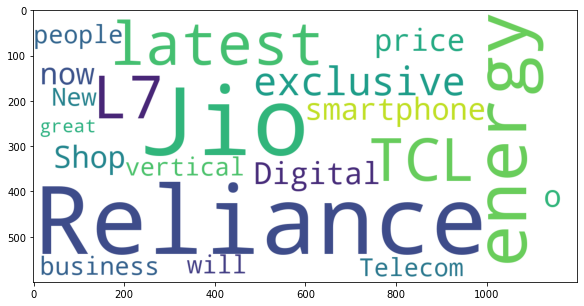

In [8]:
ptweets = df.tweets[df.sents=="Positive"].tolist()

wd = wordcloud.WordCloud(background_color='white',max_words=20,width=1200,height=600).generate_from_text(" ".join(ptweets))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

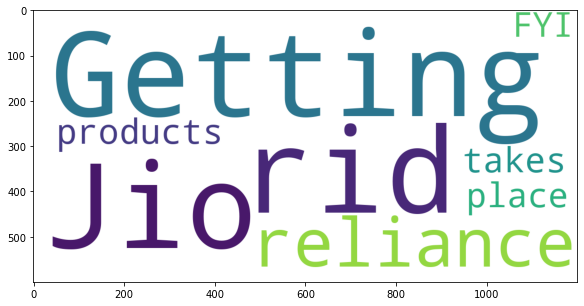

In [9]:
ntweets = df.tweets[df.sents=="Negative"].tolist()

wd = wordcloud.WordCloud(background_color='white',max_words=20,width=1200,height=600).generate_from_text(" ".join(ntweets))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

# NER Analysis

In [12]:
for tw in ptweets:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

In [13]:
for tw in ntweets:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

# Text analytics with textblob

In [14]:
data = TextBlob("Hello Everyone, Hope you are enjoying Machine Learning.")

In [15]:
data.detect_language()

'en'

In [16]:
data.translate(to='hi')

TextBlob("सभी को नमस्कार, आशा है कि आप मशीन लर्निंग का आनंद ले रहे होंगे।")

In [17]:
data.translate(to='mr')

TextBlob("प्रत्येकास अभिवादन, आशा आहे की आपण मशीन लर्निंगचा आनंद घेत असाल.")

In [18]:
data.translate(to='te')

TextBlob("అందరికీ హలో, మీరు యంత్ర అభ్యాసాన్ని ఆనందిస్తున్నారని ఆశిస్తున్నాను.")

In [19]:
data.translate(to='ka')

TextBlob("ყველას მოგესალმებით, იმედია გსიამოვნებთ მანქანური სწავლება.")

In [20]:
data.translate(to='bn')

TextBlob("সবাইকে হ্যালো, আশা করি আপনি মেশিন লার্নিং উপভোগ করছেন।")

In [21]:
data.translate(to='ta')

TextBlob("அனைவருக்கும் வணக்கம், நீங்கள் இயந்திர கற்றலை அனுபவிக்கிறீர்கள் என்று நம்புகிறேன்.")

In [22]:
data = TextBlob("the movie was amazing and i love it")
data.sentiment.polarity

0.55

In [23]:
data = TextBlob("the movie was bad and i hate it")
data.sentiment.polarity

-0.75

   # NER - Named Entity Recognition

In [11]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')
doc = nlp("John purchased a watch in Mumbai while working with State Bank of India and gifted to Cherry Kriston last monday.")


displacy.render(doc,style='ent',jupyter=True)

In [24]:
nlp?